In [66]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [67]:
df = pd.read_csv('D://code//data//data_SA_north//Huko.csv', low_memory=False)

In [23]:
df_N = pd.read_csv('D://code//data//data_SA_north//Z_N.csv', low_memory=False)

In [24]:
df_N['ENTRY_TIME'] = pd.to_datetime(df_N['ENTRY_TIME'],infer_datetime_format=True)
df_N['EXIT_TIME'] = pd.to_datetime(df_N['EXIT_TIME'],infer_datetime_format=True)
df_N['O_TIME'] = pd.to_datetime(df_N['O_TIME'],infer_datetime_format=True)
df_N['D_TIME'] = pd.to_datetime(df_N['D_TIME'],infer_datetime_format=True)

In [33]:
df_N[df_N.ENTRY_TIME.dt.day == 27].ENTRY_TIME.max()

Timestamp('2018-05-27 23:58:51.207000')

In [68]:
df['ENTRY_TIME'] = pd.to_datetime(df['ENTRY_TIME'],infer_datetime_format=True)
df['EXIT_TIME'] = pd.to_datetime(df['EXIT_TIME'],infer_datetime_format=True)
df['O_TIME'] = pd.to_datetime(df['O_TIME'],infer_datetime_format=True)
df['D_TIME'] = pd.to_datetime(df['D_TIME'],infer_datetime_format=True)

In [4]:
start_min = [00, 11, 21, 31, 41, 51]
end_min = [10, 20, 30, 40, 50, 59]
directions = ['N', 'S']
days = [21, 22, 23, 24, 25, 26, 27]
categories = [31, 32, 41, 42, 5]
hours = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
small_car = [31, 32]
big_car = [42, 5]
big_41 = [41]
n_cats = [small_car, big_41, big_car]


In [5]:
directions = ['N', 'S']

In [69]:
df.groupby('STOP').size()

STOP
P     88086
T    555668
dtype: int64

In [78]:
df[(df.ENTRY_TIME.dt.day == 21)&(df.DIRECTION_ID == "N")]['ENTRY_TIME'].max()

Timestamp('2018-05-21 23:51:23.473000')

In [21]:
ss = pd.DataFrame(df.groupby('STOP').size())

In [27]:
ss

,0
STOP,
P,769932
T,116030


In [44]:
round(ss[0][1]/ss[0].sum()*100, 2)

13.1

In [46]:
ss[0][1]/ss[0].sum()

0.13096498495420797

In [12]:
pd.DataFrame(df.groupby('STOP').size()).reset_index()[0].sum()

885962

In [8]:
df.shape

(885962, 30)

#### 比較各服務區進入量(無分車種)

In [63]:
SA_name = ["Taian", "Zhongli", "Xihu", "Xilou", "Nantou", "QingShui", "Huko", "Guanxi"]
#SA_name = ["Zhongli", "Xihu", "Xilou", "Nantou", "QingShui", "Huko", "Guanxi"]
report_dict = {}
#df_dict = {}
day_df = {}
total_list = []

for day in days :
    sa_dict = {}
    day_list = []
    for SA in SA_name :
        # loading data
        '''
        if SA == "Zhongli":
            df_N = pd.read_csv('D://code//data//data_SA_north//{0}_N.csv'.format(SA), low_memory=False)
            df_S = pd.read_csv('D://code//data//data_SA_north//{0}_S.csv'.format(SA), low_memory=False)
            df_dict['df_{0}'.format(SA)] = pd.concat([df_N, df_S])
        else :
            df_dict['df_{0}'.format(SA)] = pd.read_csv('D://code//data//data_SA_north//{0}.csv'.format(SA), low_memory=False)

        #df = pd.read_csv('D://code//data//data_SA_north//{0}.csv'.format(SA), low_memory=False)


        df_dict['df_{0}'.format(SA)]['ENTRY_TIME'] = pd.to_datetime(df_dict['df_{0}'.format(SA)]['ENTRY_TIME'],infer_datetime_format=True)
        df_dict['df_{0}'.format(SA)]['EXIT_TIME'] = pd.to_datetime(df_dict['df_{0}'.format(SA)]['EXIT_TIME'],infer_datetime_format=True)
        df_dict['df_{0}'.format(SA)]['O_TIME'] = pd.to_datetime(df_dict['df_{0}'.format(SA)]['O_TIME'],infer_datetime_format=True)
        df_dict['df_{0}'.format(SA)]['D_TIME'] = pd.to_datetime(df_dict['df_{0}'.format(SA)]['D_TIME'],infer_datetime_format=True)
        '''


        # setting for the station having only one direction
        if (SA == "Xilou") or (SA == "Guanxi") :
            directions = ["N"]
        else :
            directions = ['N', 'S']

        
        stop_series = df_dict['df_{0}'.format(SA)][df_dict['df_{0}'.format(SA)].ENTRY_TIME.dt.day == day].groupby('STOP').size()
        total_num = stop_series.sum()
        tmp_df = pd.DataFrame(stop_series)
        percentage = []
        for i in range(0, 2) :
            per_num = round((tmp_df[0][i]/total_num)*100, 2)
            per_var = "{0}%".format(per_num)
            percentage.append(per_var)
        tmp_df['percentage'] = percentage
        sa_dict['{0}_sta'.format(SA)] = tmp_df
        day_list.append(sa_dict['{0}_sta'.format(SA)])
    day_df['day_{0}'.format(day)] = pd.concat(day_list, axis=1)
    #iterables = [[day], SA_name,['car_cnt', 'percentage']]
    #col = pd.MultiIndex.from_product(iterables)
    #day_df['day_{0}'.format(day)].columns = col
    total_list.append(day_df['day_{0}'.format(day)])

result_df = pd.concat(total_list, axis=0)

iterables = [SA_name,['car_cnt', 'percentage']]
col = pd.MultiIndex.from_product(iterables)
iterables_index = [days, ['P', 'T']]
index = pd.MultiIndex.from_product(iterables_index)

result_df.columns = col
result_df.index = index

In [60]:
df_dict.keys()

dict_keys(['df_Taian', 'df_Zhongli', 'df_Xihu', 'df_Xilou', 'df_Nantou', 'df_QingShui', 'df_Huko', 'df_Guanxi'])

In [52]:
tt = df_dict['df_{0}'.format("Taian")][df_dict['df_{0}'.format("Taian")].ENTRY_TIME.dt.day == day].groupby('STOP').size()

In [56]:
df_dict['df_{0}'.format("Taian")][df_dict['df_{0}'.format("Taian")].ENTRY_TIME.dt.day == day].shape

(110525, 30)

In [54]:
tt

STOP
P    13863
T    96662
dtype: int64

In [55]:
tt.sum()

110525

In [65]:
result_df.to_excel('D://code//data//data_SA_north//analysis_result//comparison_intoSA.xlsx')

In [64]:
result_df

Taian            Zhongli               Xihu              Xilou  \
     car_cnt percentage car_cnt percentage car_cnt percentage car_cnt   
21 P    8411     10.89%    3356      2.08%    6593     11.25%    5647   
   T   68827     89.11%  157682     97.92%   52012     88.75%   34840   
22 P    7620     10.22%    3452      2.09%    5944     10.89%    5229   
   T   66948     89.78%  161841     97.91%   48643     89.11%   32302   
23 P    7720     10.48%    3741      2.26%    6092     11.08%    5890   
   T   65964     89.52%  161764     97.74%   48901     88.92%   31146   
24 P    8181     10.81%    4876      2.95%    6224     10.98%    5244   
   T   67465     89.19%  160298     97.05%   50477     89.02%   33175   
25 P   11677     12.57%    3987      2.27%    8180     11.27%    6381   
   T   81213     87.43%  172019     97.73%   64395     88.73%   38151   
26 P   15177     13.28%    3894      2.39%   10880     12.62%    5877   
   T   99106     86.72%  159174     97.61%   75317     87.38%   33278   
27 P   13863     12.54%    3642      2.51%   10372     12.28%   13832   
   T   96662     87.46%  141386     97.49%   74073     87.72%   29088   

                 Nantou            QingShui               Huko             \
     percentage car_cnt percentage  car_cnt percentage car_cnt percentage   
21 P     13.95%    3643      6.68%     5983      9.23%   98005     83.37%   
   T     86.05%   50873     93.32%    58842     90.77%   19550     16.63%   
22 P     13.93%    3346      6.68%     5053       8.2%  101128      86.8%   
   T     86.07%   46780     93.32%    56546      91.8%   15375      13.2%   
23 P      15.9%    3327      6.63%     5264      8.53%   99764     85.67%   
   T      84.1%   46865     93.37%    56454     91.47%   16692     14.33%   
24 P     13.65%    3263      6.38%     5706      8.98%  101576     87.05%   
   T     86.35%   47843     93.62%    57855     91.02%   15114     12.95%   
25 P     14.33%    4522      7.19%     7818      9.91%  119873     89.28%   
   T     85.67%   58384     92.81%    71090     90.09%   14392     10.72%   
26 P     15.01%    6743      7.93%    11520     13.06%  132560     90.67%   
   T     84.99%   78263     92.07%    76715     86.94%   13646      9.33%   
27 P     32.23%    7638      8.44%    12044     13.72%  117026     84.63%   
   T     67.77%   82852     91.56%    75732     86.28%   21261     15.37%   

      Guanxi             
     car_cnt percentage  
21 P    5647     13.95%  
   T   34840     86.05%  
22 P    5229     13.93%  
   T   32302     86.07%  
23 P    5890      15.9%  
   T   31146      84.1%  
24 P    5244     13.65%  
   T   33175     86.35%  
25 P    6381     14.33%  
   T   38151     85.67%  
26 P    5877     15.01%  
   T   33278     84.99%  
27 P   13832     32.23%  
   T   29088     67.77%

In [11]:
report_dict = {}

In [14]:
report_dict["df_{0}_stD_forDraw".format("Huko")] = state_amount_cars_sty2(df, "STOP", directions)

In [15]:
report_dict["df_{0}_stD".format("Huko")] = state_stDuration_cars_sty1(df, 'STOP', 'STOP_DURATION', directions)

In [18]:
report_dict["df_{0}_stD_forDraw".format("Huko")]

21                                             22  \
                    31        32       41       42        5        31   
N in          32426.00  10612.00  2196.00  4031.00  3593.00  31580.00   
  total       38321.00  11796.00  2212.00  4173.00  3639.00  35238.00   
  percentage     84.62     89.96    99.28    96.60    98.74     89.62   
S in          26846.00   9323.00  2165.00  3552.00  3261.00  27241.00   
  total       36627.00  11392.00  2233.00  3821.00  3341.00  35391.00   
  percentage     73.30     81.84    96.95    92.96    97.61     76.97   

                                                    ...           26  \
                    32       41       42        5   ...           31   
N in          10798.00  2032.00  4829.00  4274.00   ...     46302.00   
  total       11711.00  2046.00  4954.00  4351.00   ...     50763.00   
  percentage     92.20    99.32    97.48    98.23   ...        91.21   
S in           9848.00  2106.00  4387.00  4033.00   ...     49079.00   
  total       11746.00  2169.00  4745.00  4152.00   ...     55781.00   
  percentage     83.84    97.10    92.46    97.13   ...        87.99   

                                                         27            \
                    32       41       42        5        31        32   
N in          10576.00  3121.00  1880.00  2472.00  48835.00  10416.00   
  total       11355.00  3158.00  2008.00  2531.00  55429.00  11536.00   
  percentage     93.14    98.83    93.63    97.67     88.10     90.29   
S in          11633.00  3644.00  1787.00  2066.00  39227.00   8046.00   
  total       12846.00  3681.00  1953.00  2130.00  50345.00  10092.00   
  percentage     90.56    98.99    91.50    97.00     77.92     79.73   

                                        
                   41      42        5  
N in          3520.00  804.00  1038.00  
  total       3549.00  858.00  1070.00  
  percentage    99.18   93.71    97.01  
S in          3206.00  828.00  1106.00  
  total       3282.00  965.00  1161.00  
  percentage    97.68   85.80    95.26  

[6 rows x 35 columns]

In [19]:
report_dict["df_{0}_stD".format("Huko")]

21          22          23          24          25          26        \
       N     S     N     S     N     S     N     S     N     S     N     S   
31  10.5  10.5  10.9  10.6  11.9  10.6  12.9  11.7  10.5  12.1  13.3  16.5   
32  11.0  11.1  11.7  11.3  12.7  11.3  13.3  12.4  11.0  12.4  13.5  16.5   
41  10.6   9.6  11.4  10.6  11.6   9.8  12.8  10.8  10.5  11.5  13.5  16.7   
42  12.2  12.1  12.5  12.4  12.8  12.1  13.7  13.2  12.4  13.2  13.0  14.5   
5   11.6  11.1  11.6  11.6  12.2  11.2  12.6  12.2  11.4  11.9  12.7  14.9   

      27        
       N     S  
31  12.5  10.4  
32  12.7  10.5  
41  13.9  11.0  
42  11.9  10.3  
5   11.6  11.1

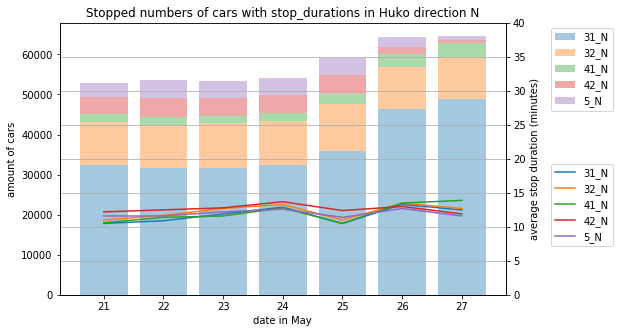

In [22]:
draw_cars_amount(days, report_dict["df_{0}_stD_forDraw".format("Huko")], report_dict["df_{0}_stD".format("Huko")], "N", "Huko", "0521_0527")

In [8]:
def state_stDuration_cars_sty1(df, stop_col, stop_duration, directions):
    
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    list_31 = []
    list_32 = []
    list_41 = []
    list_42 = []
    list_5 = []

    for day in days :

        for category in categories :

            for dire in directions :    

                #cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)][stop_duration].mean()
                r_var = round(in_var, 1)
                #per_var = float((in_var/cnt_var)*100.0)

                if category == 31 :
                    list_31.append(r_var)
                    #list_31.append(cnt_var)
                    #list_31.append(per_var)
                elif category == 32 :
                    list_32.append(r_var)
                    #list_32.append(cnt_var)
                    #list_32.append(per_var)
                elif category == 41 :
                    list_41.append(r_var)
                    #list_41.append(cnt_var)
                    #list_41.append(per_var)
                elif category == 42 :
                    list_42.append(r_var)
                    #list_42.append(cnt_var)
                    #list_42.append(per_var)
                elif category == 5 :
                    list_5.append(r_var)
                    #list_5.append(cnt_var)
                    #list_5.append(per_var)
    
    iterables = [['21', '22', '23', '24', '25', '26', '27'], directions]
    col = pd.MultiIndex.from_product(iterables)
    final_df = pd.DataFrame([list_31, list_32, list_41, list_42, list_5], index=['31', '32', '41', '42', '5'], columns=col)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

In [9]:
def state_amount_cars_sty2(df, stop_col, directions):
    # deter whether the SA has divived into N,S two station
    # but the data format isnt accomplished yet
    
    #N_in = []
    #N_total = []
    #N_percentage = []
    #S_in = []
    #S_total = []
    #S_percentage = []
    total_list = []
    
    for dire in directions :
        dire_dict = {}
        dire_dict['{0}_in'.format(dire)] = []
        dire_dict['{0}_total'.format(dire)] = []
        dire_dict['{0}_percentage'.format(dire)] = []
        
        for day in days :

            for category in categories :    

                cnt_var = df[(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category) & (df.DIRECTION_ID == dire)].shape[0]
                in_var = df[(df[stop_col] == 'P')&(df.ENTRY_TIME.dt.day == day) & (df.MVDIS_CATEGORY == category)& (df.DIRECTION_ID == dire)].shape[0]
                if cnt_var == 0 :
                    per_var = round(float(0), 2)
                else :
                    per_var = round(float((in_var/cnt_var)*100.0), 2)
                
                dire_dict['{0}_in'.format(dire)].append(in_var)
                dire_dict['{0}_total'.format(dire)].append(cnt_var)
                dire_dict['{0}_percentage'.format(dire)].append(per_var)
                
                
        #total_list = [_in, _total, _percentage]
        total_list.append(dire_dict['{0}_in'.format(dire)])   
        total_list.append(dire_dict['{0}_total'.format(dire)])
        total_list.append(dire_dict['{0}_percentage'.format(dire)])
                #'''
                #if dire == 'N' :
                #    N_in.append(in_var)
                #    N_total.append(cnt_var)
                #    N_percentage.append(per_var)
                #elif dire == 'S' :
                #    S_in.append(in_var)
                #    S_total.append(cnt_var)
                #    S_percentage.append(per_var)
                #'''
    
    iterables_col = [['21', '22', '23', '24', '25', '26', '27'], ['31', '32', '41', '42', '5']]
    column = pd.MultiIndex.from_product(iterables_col)
    iterables_index = [directions, ['in', 'total', 'percentage']]
    index = pd.MultiIndex.from_product(iterables_index)
    
    final_df = pd.DataFrame(total_list, index=index, columns=column)
    # if needed a index_version dataframe, use transpose()
    
    return final_df

In [20]:
def draw_cars_amount(X, df, stD_df, direction, SA_name, file_name):
    import matplotlib.pyplot as plt
    import numpy as np
    
    # X = ['12', '13', '14', '15', '16', '17', '18']
    # setting the variable first
    categories = [31, 32, 41, 42, 5]
    variables = {}
    
    fig, ax1 = plt.subplots(1,1,figsize=(8, 5))
    ax2 = ax1.twinx()
    
    N=7
    bottom = np.zeros(N)
    
    for ind, i in enumerate(categories) :
        data = []
        if direction == 'N' :
            variables["N_in_{0}".format(i)] = np.array([df.iloc[0, :][x] for x in [i for i in range(ind, 35, 5)]])
            #variables["N_{0}_stD".format(i)] = np.array([stD_df.iloc[ind, :][x] for x in [i for i in range(0, 14, 2)]])
            data.append(variables["N_in_{0}".format(i)])
            
            for elem in data:
                ax1.bar(X, variables["N_in_{0}".format(i)], label='{0}_{1}'.format(i, direction), alpha = 0.4, bottom = bottom)
                bottom += elem
            if len(directions) == 1 :
                ax2.plot(X,stD_df.iloc[ind, :], label='{0}_{1}'.format(i, direction))
            else :
                variables["N_{0}_stD".format(i)] = np.array([stD_df.iloc[ind, :][x] for x in [i for i in range(0, 14, 2)]])
                ax2.plot(X,variables["N_{0}_stD".format(i)], label='{0}_{1}'.format(i, direction))
            
        elif direction == 'S' :
            variables["S_in_{0}".format(i)] = [df.iloc[3, :][x] for x in [i for i in range(ind, 35, 5)]]
            #variables["S_{0}_stD".format(i)] = [stD_df.iloc[ind, :][x] for x in [i for i in range(1, 14, 2)]]
            data.append(variables["S_in_{0}".format(i)])
            
            for elem in data:
                ax1.bar(X, variables["S_in_{0}".format(i)], label='{0}_{1}'.format(i, direction), alpha = 0.4, bottom = bottom)
                bottom += elem
            #ax2.plot(X,stD_df, label='{0}_{1}'.format(i, direction))
            if len(directions) == 1 :
                ax2.plot(X,stD_df.iloc[ind, :], label='{0}_{1}'.format(i, direction))
            else :
                variables["S_{0}_stD".format(i)] = [stD_df.iloc[ind, :][x] for x in [i for i in range(1, 14, 2)]]
                ax2.plot(X,variables["S_{0}_stD".format(i)], label='{0}_{1}'.format(i, direction))
    
    ax1.set_ylabel('amount of cars')
    ax1.set_xlabel('date in May')
    lgd1 = ax1.legend(bbox_to_anchor=(1.25, 1))
    lgd2 = ax2.legend(bbox_to_anchor=(1.25, 0.5))
    ax2.set_ylim(0, 40)
    ax2.set_ylabel('average stop duration (minutes)')
    ax2.set_xlabel('date in March')


    plt.grid()
    plt.title('Stopped numbers of cars with stop_durations in {0} direction {1}'.format(SA_name, direction))
    plt.show()

    fig.savefig('D://code//graph//{2}//{1}_{0}.png'.format(direction, file_name, SA_name), bbox_extra_artists=(lgd1,lgd2), bbox_inches='tight')